# Table of Contents
1. Google Drive Setup
2. Packages and Functions
3. Loading Data and EDA
4. Data Augmentation
5. CNN with unbalanced data
6. Balancing Classes
7. CNN with balanced data
8. AlexNet Structural Model
9. Visualizations

# Google Drive Setup

In [2]:
#import to reach my google drive holding data
import os
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
pwd

'/content'

In [4]:
#get to the directory with the data
os.chdir('./drive/My Drive/Flatiron/Final Project/dataset')

In [ ]:
#unzip file for the first time
# !unzip -qq data.zip

In [5]:
pwd #be in final project dir

'/content/drive/My Drive/Flatiron/Final Project/dataset'

In [6]:
ls

backup_images/  test/  train/  val/


# Packages and Functions

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
import numpy as np
import itertools

import keras
from keras import models
from keras.models import Sequential, load_model
from keras import layers
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt
%matplotlib inline

import pickle
random_seed = 123

Using TensorFlow backend.


In [9]:
def check_data(images,labels):  
    '''
    Checking number of total images and labels to make sure they are the same
    Print the number of class images for jindo and shiba (class imbalance)
    Print the plots of 9 images
    '''
    #find all indexes with a value of 0 and use the first value of the returned tuple
    #taking the length gives the number of indexes with value 0
    num_jindo = len(np.where(labels == 0)[0]) 
    num_shiba = len(np.where(labels == 1)[0])
    
    diff = abs(num_jindo-num_shiba)
    
    print('Number of images: {} and labels: {}'.format(len(images), len(labels)))
    print('Number of Jindo images: {}, Number of Shiba images: {}'.format(num_jindo,num_shiba))
    if num_jindo != num_shiba:
        print('Class is imbalanced by: {}'.format(diff))
    
    #plot with matplotlib    
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow((images[i]*225).astype(np.uint8)) #cast to avoid clipping data error
        plt.axis('off') #Turn axes on or off
    plt.show()

In [10]:
def pickle_save(model,name):
    '''
    saving models with pickle
    '''
    full_name = name + '.pickle'
    with open(full_name, 'wb') as f:
        pickle.dump(model, f)

# Loading data and EDA

In [12]:
#Train data
train_data = ImageDataGenerator(rescale = 1./225).flow_from_directory( 
        './train', 
        target_size=(224, 224), 
        batch_size = 1817,
        classes = ['jindo','shiba'],
        class_mode = 'binary',
         seed = random_seed
) 

X_train, y_train = next(train_data)

X_train = X_train_images 
y_train = X_train_labels

Found 1817 images belonging to 2 classes.


In [15]:
#Test Data
train_data = ImageDataGenerator(rescale = 1./225).flow_from_directory( 
        './test', 
        target_size=(224, 224), 
        batch_size = 30,
        classes = ['jindo','shiba'],
        class_mode = 'binary',
         seed = random_seed
) 

X_test, y_test = next(train_data)

Found 30 images belonging to 2 classes.


In [16]:
#Val Data
train_data = ImageDataGenerator(rescale = 1./225).flow_from_directory( 
        './val', 
        target_size=(224, 224), 
        batch_size = 30,
        classes = ['jindo','shiba'],
        class_mode = 'binary',
         seed = random_seed
) 

X_val, y_val = next(train_data)

Found 30 images belonging to 2 classes.


Number of images: 30 and labels: 30
Number of Jindo images: 15, Number of Shiba images: 15


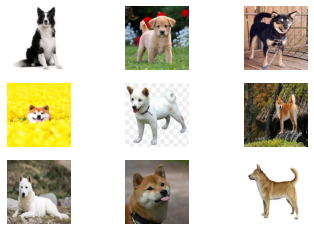

In [17]:
plt.axis('off')
check_data(X_val,y_val)

# Modeling New Data Set

---

In [18]:
cnn_withdrop = models.Sequential()

#feature learning
cnn_withdrop.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3)))
cnn_withdrop.add(layers.MaxPooling2D((2, 2)))
cnn_withdrop.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_withdrop.add(layers.MaxPooling2D((2, 2)))

cnn_withdrop.add(Dropout(0.3, input_shape=(224,224,3)))

# cnn_withdrop.add(BatchNormalization())

#classification
cnn_withdrop.add(layers.Flatten())
cnn_withdrop.add(layers.Dense(32, activation='relu'))

cnn_withdrop.add(Dropout(0.3, input_shape=(224,224,3)))

cnn_withdrop.add(layers.Dense(1, activation='sigmoid'))

cnn_withdrop.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [19]:
cnn_dropout = cnn_withdrop.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=260,
                    validation_data=(X_val, y_val))

Train on 1817 samples, validate on 30 samples
Epoch 1/5
1817/1817 [==============================] - 16s 9ms/step - loss: 1.1584 - acc: 0.5289 - val_loss: 0.6919 - val_acc: 0.5000
Epoch 2/5
1817/1817 [==============================] - 3s 2ms/step - loss: 0.6912 - acc: 0.5118 - val_loss: 0.6918 - val_acc: 0.4667
Epoch 3/5
1817/1817 [==============================] - 3s 2ms/step - loss: 0.6876 - acc: 0.5867 - val_loss: 0.6718 - val_acc: 0.6000
Epoch 4/5
1817/1817 [==============================] - 3s 2ms/step - loss: 0.6667 - acc: 0.6142 - val_loss: 0.6643 - val_acc: 0.7000
Epoch 5/5
1817/1817 [==============================] - 3s 2ms/step - loss: 0.6380 - acc: 0.6362 - val_loss: 0.6765 - val_acc: 0.6333


In [20]:
results_train_dropout = cnn_withdrop.evaluate(X_train, y_train)
results_test_dropout = cnn_withdrop.evaluate(X_test, y_test)
print('Train: ',results_train_dropout[1], ' Test: ',results_test_dropout[1])

predictions_dropout = cnn_withdrop.predict(X_test)
predictions_dropout = np.around(predictions_dropout)

print('F1: ',f1_score(y_test,predictions_dropout))
confusion_matrix(y_test, predictions_dropout)

30/30 [==============================] - 0s 906us/step
Train:  0.7193175554275513  Test:  0.6000000238418579
F1:  0.6470588235294117


array([[ 7,  8],
       [ 4, 11]])

In [ ]:
def make_alex():
  '''
  Make a model with the same structure as an AlexNet. The structural alexnet code is from https://engmrk.com/alexnet-implementation-using-keras/, and
  changes of dropout regularization perecent and learning rate have been adjusted for my model
  '''
  #clear an existing models
  keras.backend.clear_session()

  #Instantiate an empty model
  model = Sequential()

  # 1st Convolutional Layer
  model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
  model.add(Activation('relu'))
  # Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

  # 2nd Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
  # Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

  # 3rd Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))

  # 4th Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))

  # 5th Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
  # Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

  # Passing it to a Fully Connected layer
  model.add(Flatten())
  # 1st Fully Connected Layer
  model.add(Dense(4096, input_shape=(224*224*3,)))
  model.add(Activation('relu'))
  # Add Dropout to prevent overfitting
  model.add(Dropout(0.1))

  # 2nd Fully Connected Layer
  model.add(Dense(4096))
  model.add(Activation('relu'))
  # Add Dropout
  model.add(Dropout(0.1))

  # 3rd Fully Connected Layer
  model.add(Dense(1000))
  model.add(Activation('relu'))
  # Add Dropout
  model.add(Dropout(0.1))

  # Output Layer
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  # model.summary() #Print the summary if needed

  #Step own optimizer's learning rate
  optimizer = keras.optimizers.Adam(lr=0.0001)

  # Compile the model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"]) 
  
  return model

In [22]:
model_test = make_alex()

In [23]:
 cnn = model_test.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=260,
                    shuffle = False,
                    validation_data=(X_val, y_val))

Train on 1817 samples, validate on 30 samples
Epoch 1/10
1817/1817 [==============================] - 11s 6ms/step - loss: 0.6936 - accuracy: 0.4937 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/10
1817/1817 [==============================] - 2s 876us/step - loss: 0.6921 - accuracy: 0.5113 - val_loss: 0.6877 - val_accuracy: 0.6667
Epoch 3/10
1817/1817 [==============================] - 2s 870us/step - loss: 0.6835 - accuracy: 0.5625 - val_loss: 0.6650 - val_accuracy: 0.6333
Epoch 4/10
1817/1817 [==============================] - 2s 866us/step - loss: 0.6408 - accuracy: 0.6335 - val_loss: 0.6424 - val_accuracy: 0.7000
Epoch 5/10
1817/1817 [==============================] - 2s 869us/step - loss: 0.6152 - accuracy: 0.6511 - val_loss: 0.5970 - val_accuracy: 0.7000
Epoch 6/10
1817/1817 [==============================] - 2s 867us/step - loss: 0.5902 - accuracy: 0.6775 - val_loss: 0.5655 - val_accuracy: 0.7333
Epoch 7/10
1817/1817 [==============================] - 2s 872us/step - loss: 0

In [24]:
results_train = model_test.evaluate(X_train, y_train)
results_test = model_test.evaluate(X_test, y_test)
print('Train: ',results_train[1], ' Test: ',results_test[1])

predictions = model_test.predict(X_test)
predictions = np.around(predictions)

print('F1: ',f1_score(y_test,predictions))
confusion_matrix(y_test, predictions)

30/30 [==============================] - 0s 601us/step
Train:  0.7638965249061584  Test:  0.699999988079071
F1:  0.7272727272727272


array([[ 9,  6],
       [ 3, 12]])

##Visualizing wrong labels

In [25]:
def plot_predictions(misclassified,name): 
  '''
  Given a tuple of image array data, true, and pred labels return the plot of the first 9 images with their respective labels
  '''

  save_name = '{}.png'.format(name
                              )
  for i in range(9):
        plt.figure(1 , figsize = (8,8))
        plt.subplots_adjust(hspace = 0.5, wspace = 0.01)

        img_array = misclassified[i][0]
        true_label = 'Shiba' if misclassified[i][1] == 1 else 'Jindo'
        pred_label = 'Shiba' if float(misclassified[i][2]) == 1 else 'Jindo'

        plt.subplot(330 + 1 + i)
        plt.imshow((img_array*225).astype(np.uint8)) #cast to avoid clipping data error
        plt.title(' True labels: {} \n Pred Label: {}'.format(true_label, pred_label))
        plt.axis('off') #Turn axes on or off

        plt.savefig(save_name, transparent = True, bbox_inches='tight')

  plt.show()

In [26]:
classified = []
misclassified = []

for x,y,z in zip(X_test, y_test, predictions_dropout):
  if y != z:
    misclassified.append((x,y,z))
  else:
    classified.append((x,y,z))

len(classified),len(misclassified)

(18, 12)

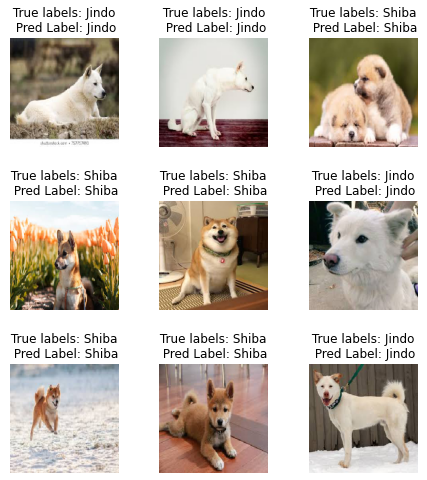

In [27]:
plot_predictions(classified,'classified')

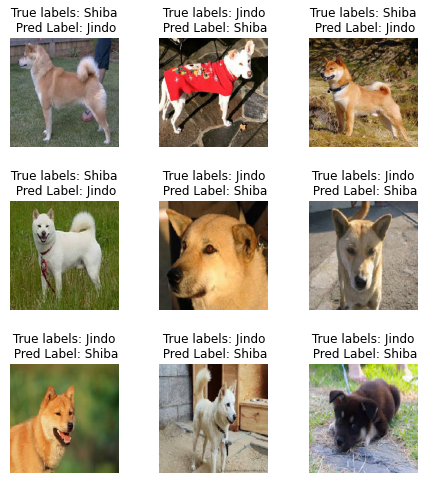

In [28]:
plot_predictions(misclassified, 'misclassified')

# Visualizations

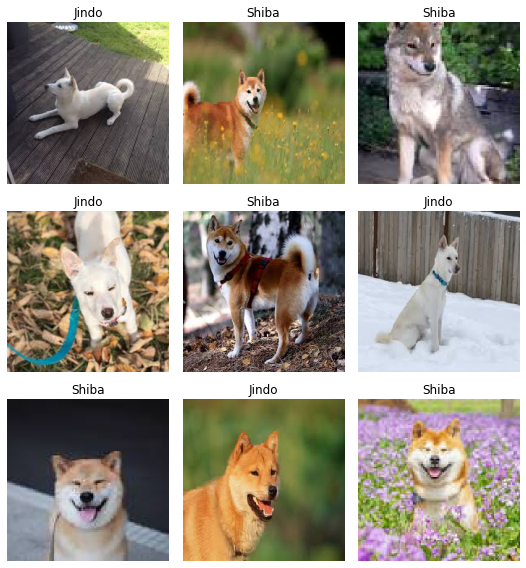

In [ ]:
for i in range(9):
        plt.figure(1 , figsize = (8,8))
        plt.subplot(330 + 1 + i)
        plt.imshow((images[i]*225).astype(np.uint8)) #cast to avoid clipping data error
        plt.axis('off') #Turn axes on or off
        plt.subplots_adjust(hspace = 0.5, wspace = 0.01)
        if labels[i] == 0:
            class_ = 'Jindo'
        else:
            class_ = 'Shiba'
        plt.title(class_)

plt.tight_layout()
# plt.savefig('data_original_collage.png', bbox_inches='tight', transparent = True)        
plt.show()

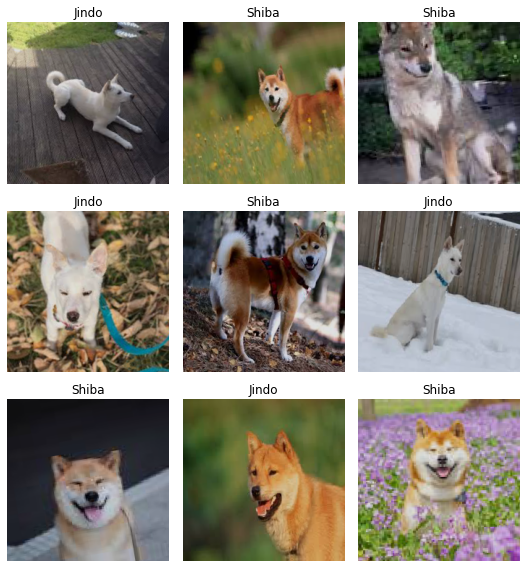

In [ ]:
for i in range(9):
        plt.figure(1 , figsize = (8,8))
        plt.subplot(330 + 1 + i)
        plt.imshow((images_gen1[i]*225).astype(np.uint8)) #cast to avoid clipping data error
        plt.axis('off') #Turn axes on or off
        plt.subplots_adjust(hspace = 0.5, wspace = 0.01)
        if labels_gen1[i] == 0:
            class_ = 'Jindo'
        else:
            class_ = 'Shiba'
        plt.title(class_)

plt.tight_layout()

# plt.savefig('data_augmented.png', bbox_inches='tight', transparent = True)        
plt.show()

In [ ]:
## Trusty ol' resuable matrix graph code
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation = 45)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

[[183  53]
 [ 58 166]]


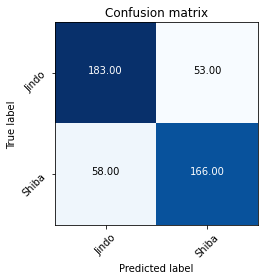

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test,predictions), ['Jindo','Shiba'], normalize = False)
# plt.savefig('confusion_matrix.png', transparent = True)        